## TYK2 DMS IL-23 Assay

### Summary Statistics
  -  DL4-1: [Normalized](../sumstats/TYK2/run10/tyk2-run10-DL4_1-normalized.tsv), [Unnormalized](../sumstats/TYK2/run10/tyk2-run10-DL4_1-unnormalized.tsv)
  -  DL4-2: [Normalized](../sumstats/TYK2/run10/tyk2-run10-DL4_2-normalized.tsv), [Unnormalized](../sumstats/TYK2/run10/tyk2-run10-DL4_1-unnormalized.tsv)
  -  DL7: [Normalized](../sumstats/TYK2/run10/tyk2-run10-DL7-normalized.tsv), [Unnormalized](../sumstats/TYK2/run10/tyk2-run10-DL7-unnormalized.tsv)

### Heatmaps

In [157]:
library(ggpubr)
library(patchwork)
library(knitr)
library(tidyverse)

source("../src/dms-analysis-utils.R")

sumstats_norm <- read_tsv("../sumstats/TYK2/run10/tyk2-run10-DL4_1-normalized.tsv")
sumstats_raw <- read_tsv("../sumstats/TYK2/run10/tyk2-run10-DL4_1-unnormalized.tsv")

Rows: 1400 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): aa, contrast
dbl (7): chunk, pos, log2ContrastEstimate, log2ContrastError, statistic, p.v...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2800 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): aa, contrast
dbl (6): chunk, pos, log2FoldChange, log2StdError, statistic, p.value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [96]:
heat_raw_l2fc <- sumstats_raw %>%
    mutate(aa = if_else(aa == "*", "Stop", aa)) %>%
    ggplot() +
        geom_tile(aes(x = pos, y = fct_rev(aa), fill =log2FoldChange)) +
        scale_fill_scico_mid( limits = c(-1,1), palette = "vik", mid = 0, oob = squish) +
        theme_pubr(base_size = 16, x.text.angle = 45) +
        theme(legend.text=element_text(size=14),
              legend.key.size = unit(1,"cm"),
              axis.text.y = element_text(size = 14)) +
        facet_wrap(~contrast, ncol = 1)  +
        xlab("TYK2 Position") + ylab("")

heat_raw_z <- sumstats_raw %>%
    mutate(aa = if_else(aa == "*", "Stop", aa)) %>%
    ggplot() +
        geom_tile(aes(x = pos, y = fct_rev(aa), fill = statistic)) +
        scale_fill_scico_mid( limits = c(-8,5), palette = "vik", mid = 0, oob = squish) +
        theme_pubr(base_size = 16, x.text.angle = 45) +
        theme(legend.text=element_text(size=14),
              legend.key.size = unit(1,"cm"),
              axis.text.y = element_text(size = 14)) +
        facet_wrap(~contrast, ncol = 1)  +
        xlab("TYK2 Position") + ylab("")

heat_norm_l2fc <- sumstats_norm %>%
    mutate(aa = if_else(aa == "*", "Stop", aa)) %>%
    ggplot() +
        geom_tile(aes(x = pos, y = fct_rev(aa), fill = log2ContrastEstimate)) +
        scale_fill_scico_mid( limits = c(-1,1), palette = "vik", mid = 0, oob = squish) +
        theme_pubr(base_size = 16, x.text.angle = 45) +
        theme(legend.text=element_text(size=14),
              legend.key.size = unit(1,"cm"),
              axis.text.y = element_text(size = 14)) +
        xlab("TYK2 Position") + ylab("") +
        ggtitle("IL-23 minus None")

heat_norm_z <- sumstats_norm %>%
    mutate(aa = if_else(aa == "*", "Stop", aa)) %>%
    ggplot() +
        geom_tile(aes(x = pos, y = fct_rev(aa), fill =statistic)) +
        scale_fill_scico_mid( limits = c(-8,5), palette = "vik", mid = 0, oob = squish) +
        theme_pubr(base_size = 16, x.text.angle = 45) +
        theme(legend.text=element_text(size=14),
              legend.key.size = unit(1,"cm"),
              axis.text.y = element_text(size = 14))  +
        xlab("TYK2 Position") + ylab("") +
        ggtitle("IL-23 minus None")

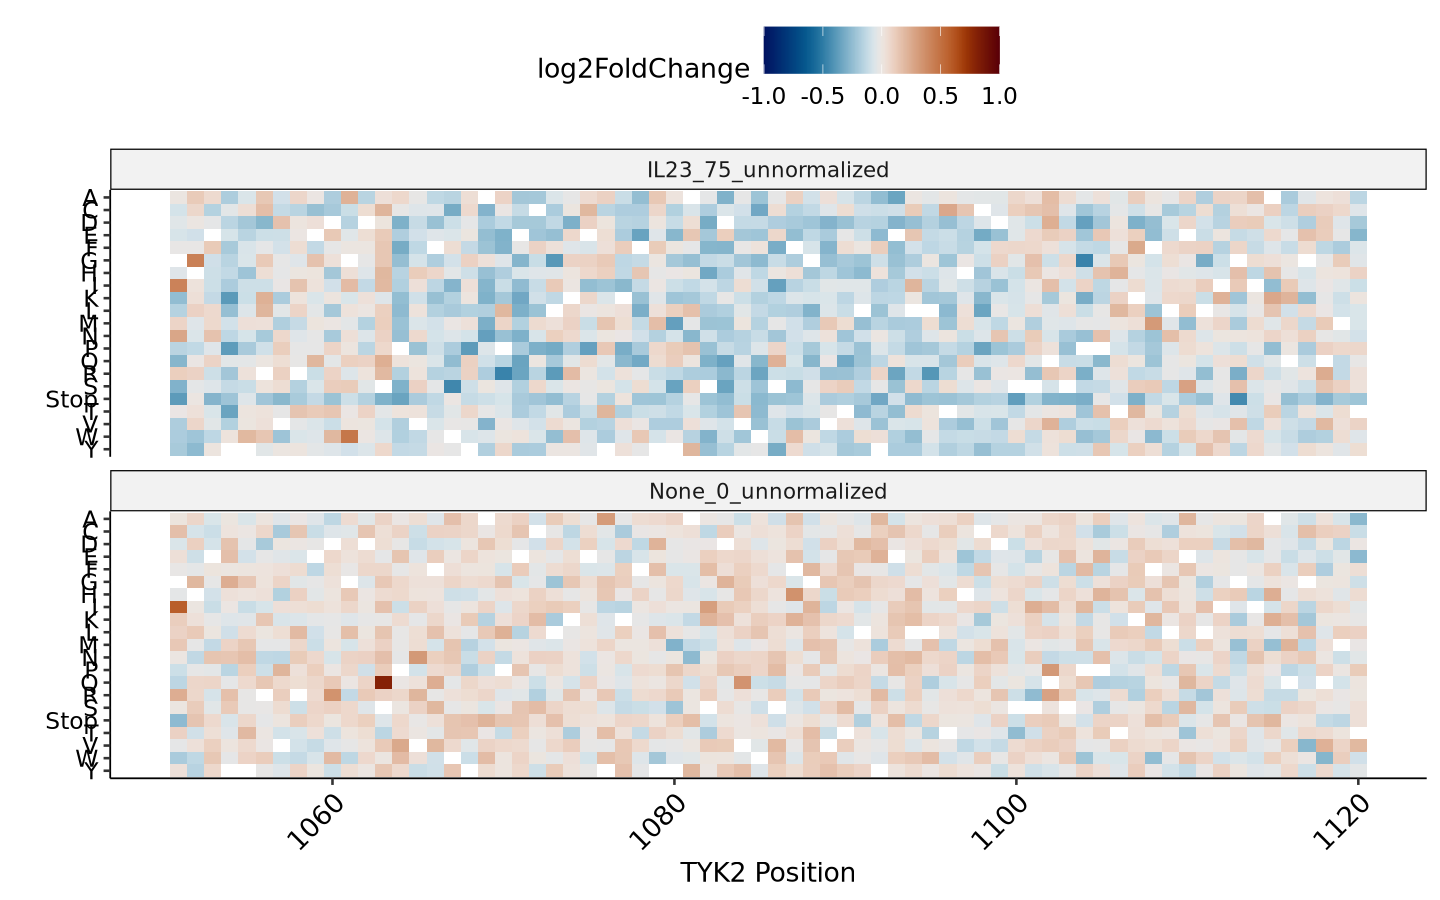

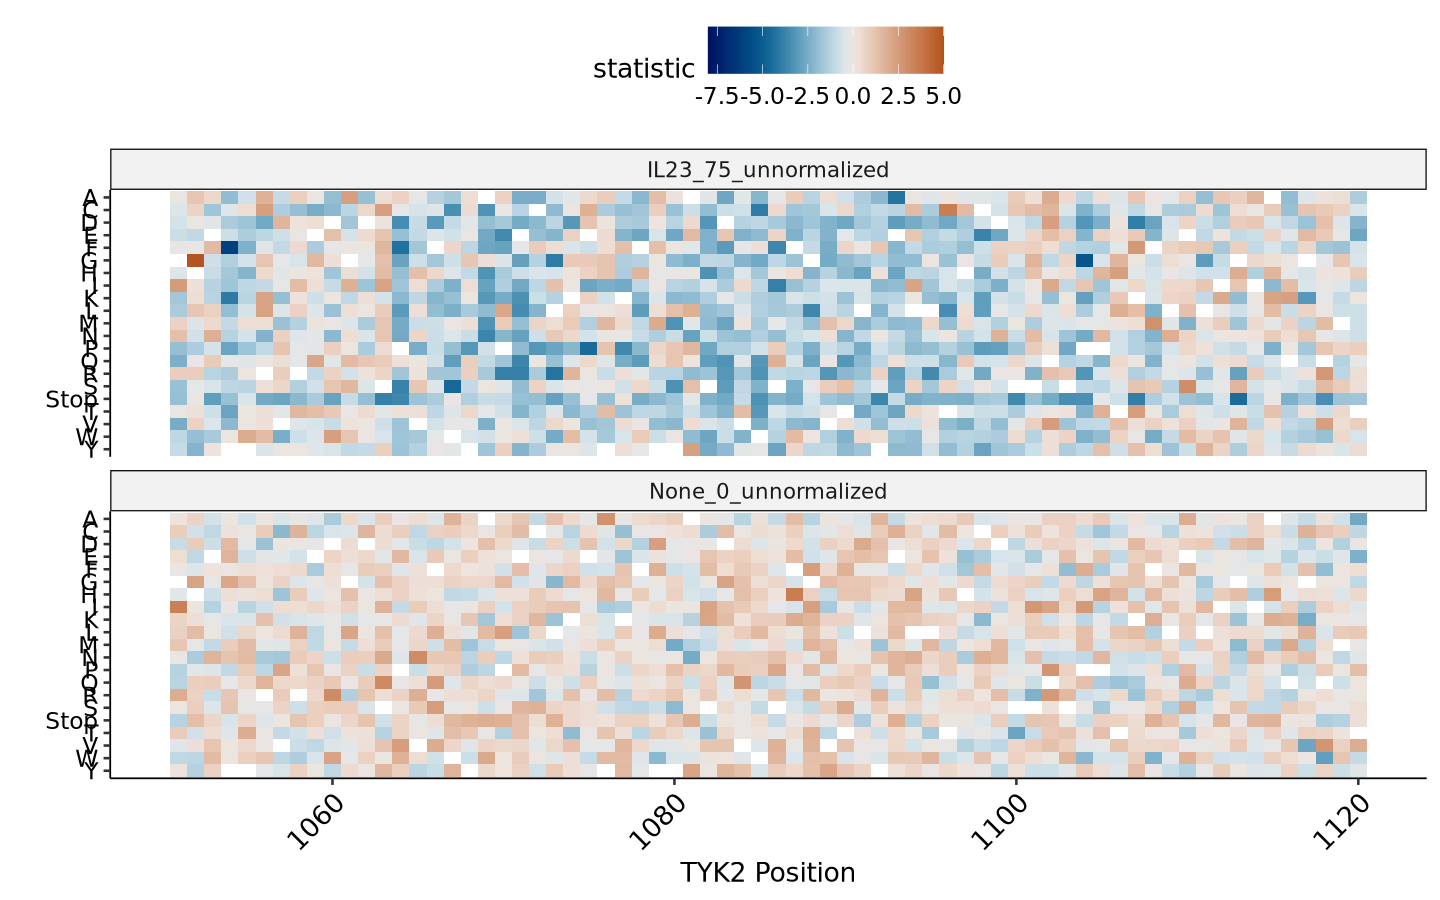

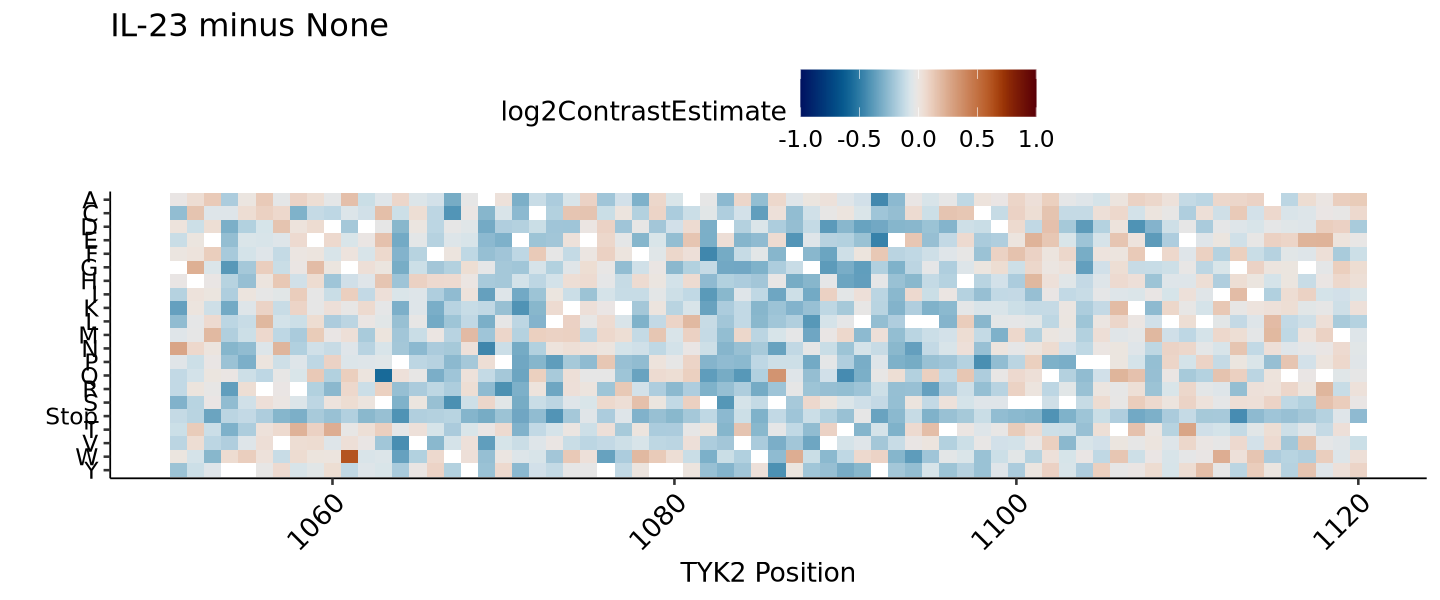

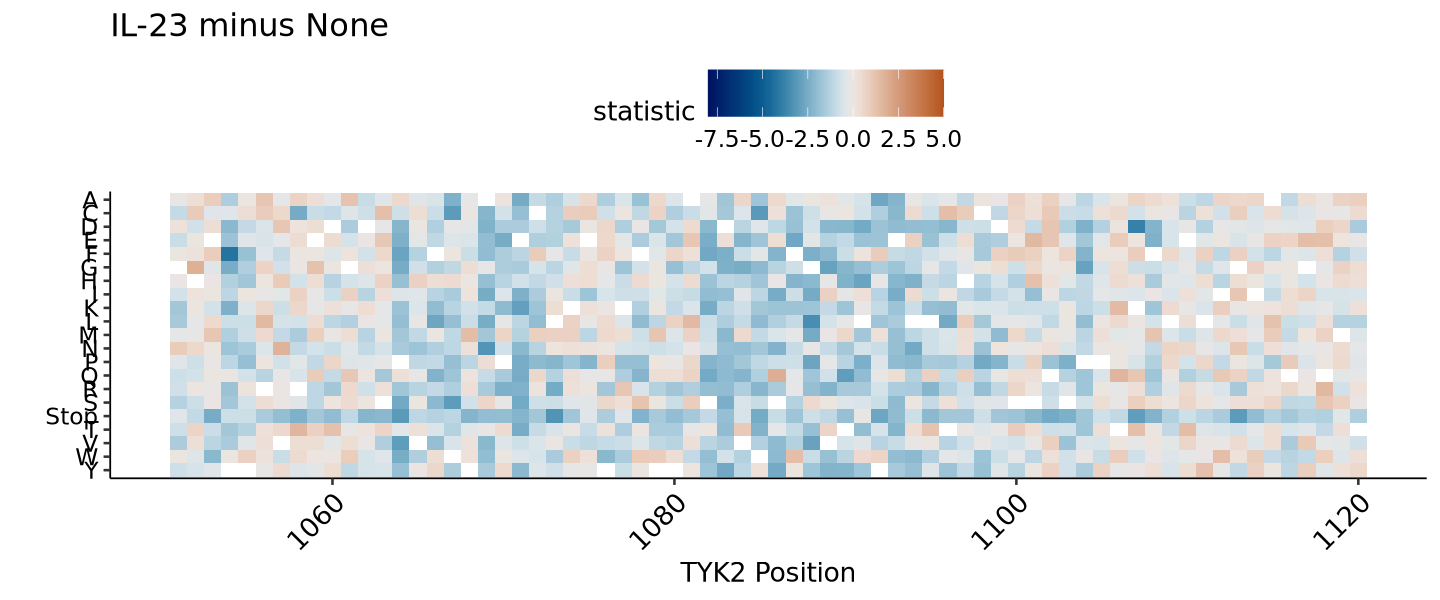

In [97]:
options(repr.plot.width = 12, repr.plot.height = 7.5)
heat_raw_l2fc
heat_raw_z

options(repr.plot.width = 12, repr.plot.height = 5)
heat_norm_l2fc 
heat_norm_z

In [101]:
pdf("../dataviz/TYK2/il23/TYK2-IL23-run10-heatmaps-unnormalized.pdf", width = 12, height = 7.5)
heat_raw_l2fc
heat_raw_z
dev.off()

pdf("../dataviz/TYK2/il23/TYK2-IL23-run10-heatmaps-normalized.pdf", width = 12, height = 5)
heat_norm_l2fc 
heat_norm_z
dev.off()

png 
  2

png 
  2

### Spike-ins

In [81]:
spikeins <- sumstats_raw %>%
    filter(str_c(pos, aa) %in% c("1104A", "1054F", "1055F")) %>%
    mutate(contrast = gsub("_unnormalized", "", contrast)) %>%
    ggplot() +
        geom_pointrange(aes(x = str_c(pos, aa),
                            y = log2FoldChange,
                            ymin = log2FoldChange - 2*log2StdError,
                            ymax = log2FoldChange + 2*log2StdError,
                            color = contrast,
                            group = contrast),
                        position = position_dodge(width = 0.4), size = 1, linewidth = 1) +
        theme_pubr(base_size = 16) +
        scale_color_manual(values = c("None_0" = "gray",
                                      "IL23_75" = "magenta")) +
        geom_hline(yintercept = 0, lty = "dashed") +
        theme(legend.title = element_blank()) +
        xlab("") + ylab("Log2 Fold Change\n+/- 2 Standard Errors")

spikein_stop <- sumstats_raw %>%
    filter(str_c(pos, aa) %in% c("1104*", "1054*", "1055*")) %>%
    mutate(contrast = gsub("_unnormalized", "", contrast)) %>%
    ggplot() +
        geom_pointrange(aes(x = str_c(pos, aa),
                            y = log2FoldChange,
                            ymin = log2FoldChange - 2*log2StdError,
                            ymax = log2FoldChange + 2*log2StdError,
                            color = contrast,
                            group = contrast),
                        position = position_dodge(width = 0.4), size = 1, linewidth = 1) +
        theme_pubr(base_size = 16) +
        scale_color_manual(values = c("None_0" = "gray",
                                      "IL23_75" = "magenta")) +
        geom_hline(yintercept = 0, lty = "dashed") +
        theme(legend.title = element_blank()) +
        xlab("") + ylab("Log2 Fold Change\n+/- 2 Standard Errors")

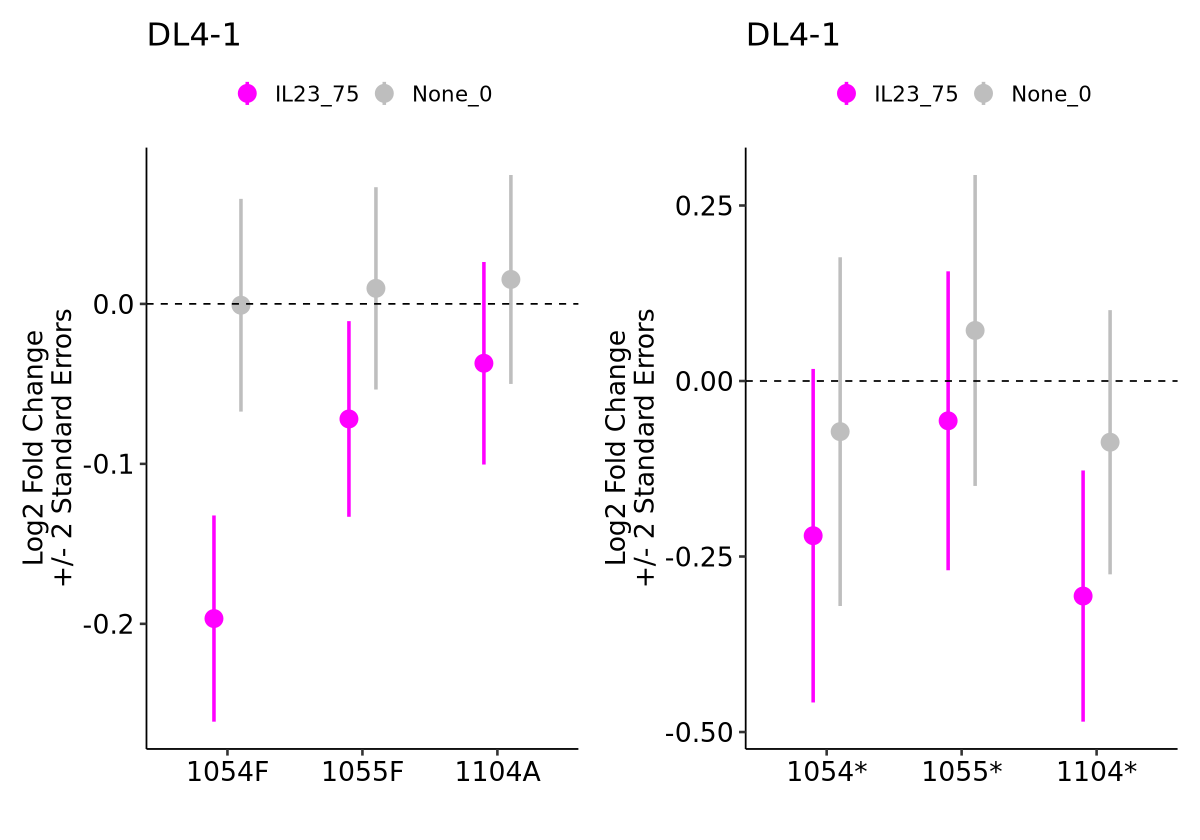

In [89]:
options(repr.plot.width = 10, repr.plot.height = 7)
spikeins + spikein_stop & ggtitle("DL4-1")

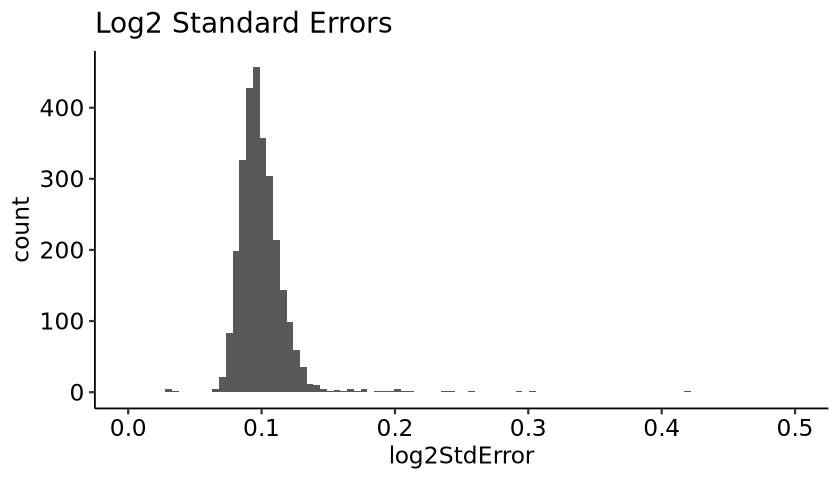

In [95]:
options(repr.plot.width = 7, repr.plot.height = 4, warn = -1)
sumstats_raw %>%
    ggplot() +
        geom_histogram(aes(x = log2StdError), bins = 100) +
        theme_pubr(base_size = 14) +
        xlim(c(0, 0.5)) +
        ggtitle("Log2 Standard Errors")

### IL-23 <-> IFN-alpha Comparison

In [137]:
sumstats_ifna <- read_tsv("../sumstats/TYK2/run7/tyk2-assay7.tsv") %>%
    filter(condition == "IFNalpha100_0 - None_0")

sumstats_combined <- inner_join(
    sumstats_ifna %>% dplyr::select(pos, aa, estimate, std.error, statistic),
    sumstats_norm %>% dplyr::select(pos, aa, log2ContrastEstimate, log2ContrastError, statistic) %>%
        rename("statistic_norm" = "statistic")
)

Rows: 94876 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): drug, clone, chunk, aa, version, condition
dbl (8): conc, pos, estimate, std.error, dispersion, statistic, p.value, p.adj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining with `by = join_by(pos, aa)`


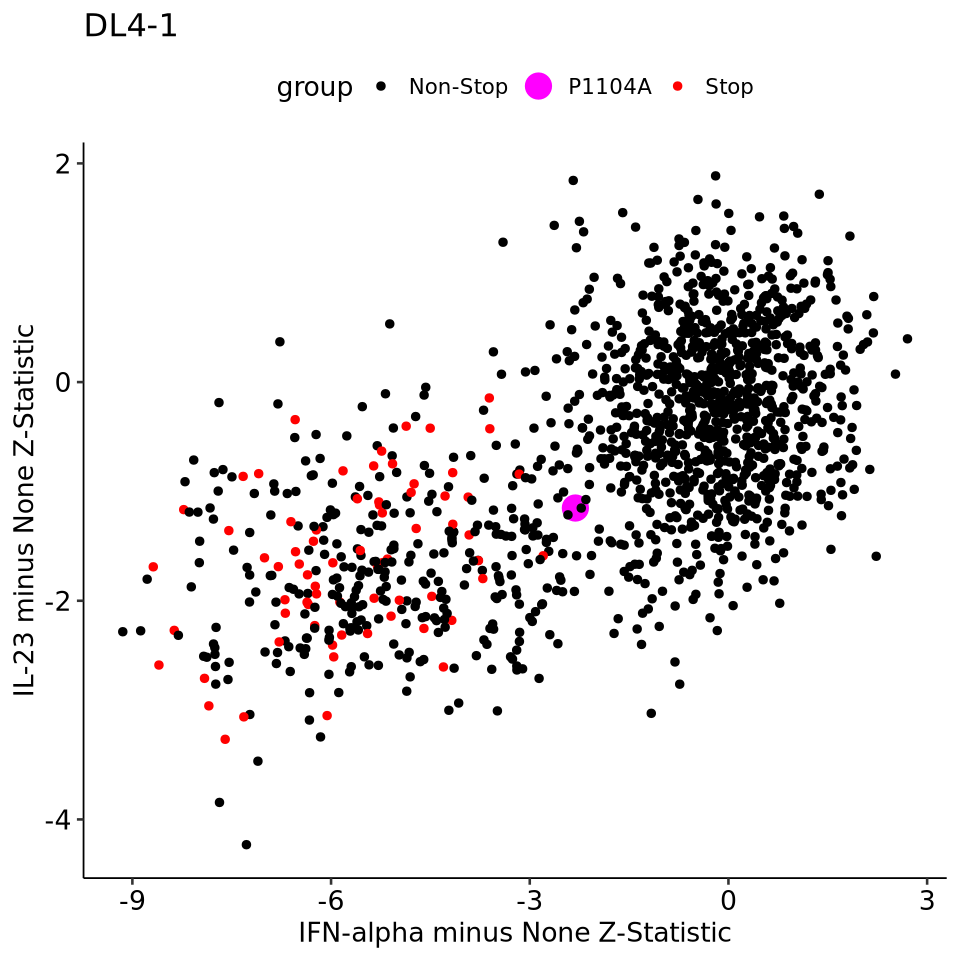

In [138]:
options(repr.plot.width = 8, repr.plot.height = 8)
sumstats_combined %>%
    mutate(group = if_else(aa == "*", "Stop", "Non-Stop"),
           group = if_else(aa == "A" & pos == 1104, "P1104A", group)) %>%
    ggplot() +
        geom_point(aes(x = statistic,
                       y = statistic_norm,
                       color = group, size = group)) +
        theme_pubr(base_size = 16) +
        scale_color_manual(values = c("Stop" = "red", "Non-Stop" = "black", "P1104A" = "magenta")) +
        scale_size_manual(values = c("Stop" = 2, "Non-Stop" = 2, "P1104A" = 7)) +
        xlab("IFN-alpha minus None Z-Statistic") +
        ylab("IL-23 minus None Z-Statistic") +
        ggtitle("DL4-1")

In [158]:
sumstats_combined %>%
    filter(statistic_norm < -2,
           statistic > -1) %>%
    arrange(pos) %>%
    rename("Position" = "pos",
           "AA" = "aa",
           "IFNalpha_log2FoldChange" = "estimate",
           "IFNalpha_log2StdError" = "std.error",
           "IFNalpha_Zstatistic" = "statistic",
           "IL23_log2FoldChange" = "log2ContrastEstimate",
           "IL23_log2StdError" = "log2ContrastError",
           "IL23_Zstatistic" = "statistic_norm") %>%
    kable("markdown")



| Position|AA | IFNalpha_log2FoldChange| IFNalpha_log2StdError| IFNalpha_Zstatistic| IL23_log2FoldChange| IL23_log2StdError| IL23_Zstatistic|
|--------:|:--|-----------------------:|---------------------:|-------------------:|-------------------:|-----------------:|---------------:|
|     1053|W  |              -0.0827550|             0.2978072|          -0.2778813|          -0.2754210|         0.1277546|       -2.155860|
|     1058|C  |              -0.2016777|             0.2499065|          -0.8070123|          -0.2942338|         0.1149411|       -2.559865|
|     1070|K  |              -0.2310286|             0.2871290|          -0.8046161|          -0.2367976|         0.1156177|       -2.048109|
|     1078|Q  |              -0.0574185|             0.3408507|          -0.1684565|          -0.3507207|         0.1543106|       -2.272822|
|     1091|H  |              -0.2205913|             0.2998932|          -0.7355662|          -0.3693397|         0.1336696|       -2.763079|
|   